In [1]:
import pandas as pd 

In [2]:
test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")
train = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
train['train']  = 1
test['train']  = 0
df = pd.concat([train, test], axis=0,sort=False)

# Drop Features With Too Many Nan Value

In [3]:
#Percentage of NAN Values 
NAN = [(c, df[c].isna().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN = NAN[NAN.percentage > 50]
NAN.sort_values("percentage", ascending=False)

,column_name,percentage
72,PoolQC,99.657417
74,MiscFeature,96.402878
6,Alley,93.216855
73,Fence,80.438506


In [4]:
#Drop PoolQC, MiscFeature, Alley and Fence features
df = df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [5]:
categorical_df = df.select_dtypes(include=['object'])
numerical_df =df.select_dtypes(exclude=['object'])

# Numerical Features

In [6]:
#Number of null values in each feature
null_counts = numerical_df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
Id                  0
MSSubClass          0
LotFrontage       486
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
train               0
dtype: int64


In [7]:
print(numerical_df["LotFrontage"].median())
numerical_df['GarageYrBlt'] = numerical_df['GarageYrBlt'].fillna(numerical_df['YearBuilt'])
numerical_df['LotFrontage'] = numerical_df['LotFrontage'].fillna(numerical_df["LotFrontage"].median())

68.0


C:\Users\11314\AppData\Local\Temp/ipykernel_18476/1985867765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['GarageYrBlt'] = numerical_df['GarageYrBlt'].fillna(numerical_df['YearBuilt'])
C:\Users\11314\AppData\Local\Temp/ipykernel_18476/1985867765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['LotFrontage'] = numerical_df['LotFrontage'].fillna(numerical_df["LotFrontage"].median())


In [8]:
numerical_df= numerical_df.fillna(0)

In [9]:
print(numerical_df.loc[numerical_df['Id']==2593,'GarageYrBlt'])
numerical_df.loc[numerical_df['Id']==2593,'GarageYrBlt']=2007
print(numerical_df[(numerical_df['YrSold']-numerical_df['YearBuilt']) < 0])
numerical_df.loc[numerical_df['YrSold'] < numerical_df['YearBuilt'],'YrSold' ] = 2009

1132    2207.0
Name: GarageYrBlt, dtype: float64
        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
1089  2550          20        128.0    39290           10            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  OpenPorchSF  \
1089       2008          2009      1224.0      4010.0  ...          484   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
1089              0          0            0         0    17000      10   

      YrSold  SalePrice  train  
1089    2007        0.0      0  

[1 rows x 39 columns]


In [10]:
numerical_df['Age_House']= (numerical_df['YrSold']-numerical_df['YearBuilt'])
numerical_df['TotalBsmtBath'] = numerical_df['BsmtFullBath'] + numerical_df['BsmtFullBath']*0.5
numerical_df['TotalBath'] = numerical_df['FullBath'] + numerical_df['HalfBath']*0.5 
numerical_df['TotalSA']=numerical_df['TotalBsmtSF'] + numerical_df['1stFlrSF'] + numerical_df['2ndFlrSF']

In [12]:
print(numerical_df.head())
numerical_df.to_csv("preprocessed/numerical.csv",index=False)

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  PoolArea  MiscVal  MoSold  \
0          2003       196.0       706.0  ...         0        0       2   
1          1976         0.0       978.0  ...         0        0       5   
2          2002       162.0       486.0  ...         0        0       9   
3          1970         0.0       216.0  ...         0        0       2   
4          2000       350.0       655.0  ...         0        0      12   

   YrSold  SalePrice  train  Age_House  TotalBsmtBath  TotalBath  To

# Categorical Features

In [13]:
#Number of null values in each feature
null_counts = categorical_df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
MSZoning            4
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
SaleType            1
SaleCondition       0
dtype: int64


In [14]:
#fill missing values for these features with 'NA'
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond']
categorical_df[columns_None]= categorical_df[columns_None].fillna('NA')

c:\Users\11314\anaconda3\lib\site-packages\pandas\core\frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [15]:
#fill missing values for each feature uwith its most frequent value
columns_with_lowNA = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical','KitchenQual','Functional','SaleType']
categorical_df[columns_with_lowNA] = categorical_df[columns_with_lowNA].fillna(categorical_df.mode().iloc[0])


## Make Some Plots and Delete Features With Low Variance


AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

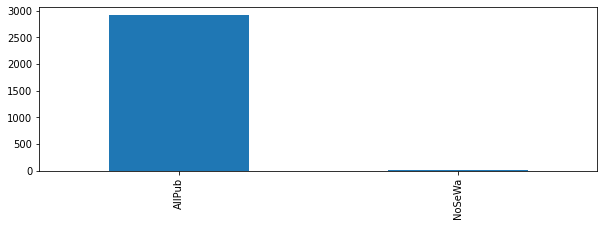

In [16]:
categorical_df['Utilities'].value_counts().plot(kind='bar',figsize=[10,3])
categorical_df['Utilities'].value_counts() 

Pave    2907
Grvl      12
Name: Street, dtype: int64

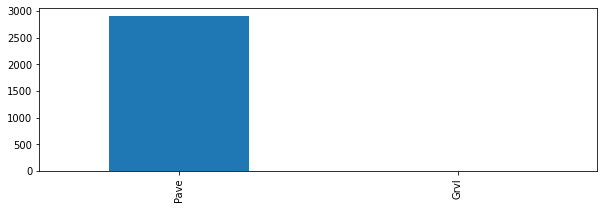

In [17]:
categorical_df['Street'].value_counts().plot(kind='bar',figsize=[10,3])
categorical_df['Street'].value_counts() 

Norm      2889
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

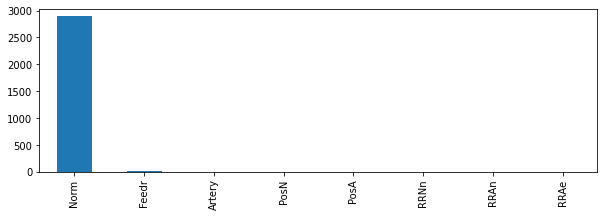

In [18]:
categorical_df['Condition2'].value_counts().plot(kind='bar',figsize=[10,3])
categorical_df['Condition2'].value_counts() 


CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

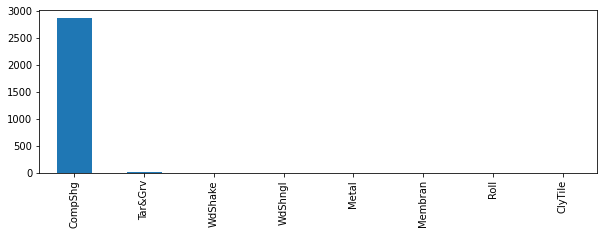

In [19]:
categorical_df['RoofMatl'].value_counts().plot(kind='bar',figsize=[10,3])
categorical_df['RoofMatl'].value_counts() 

GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

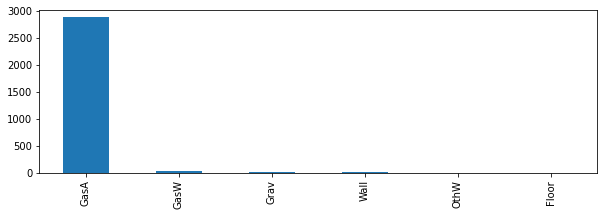

In [20]:
categorical_df['Heating'].value_counts().plot(kind='bar',figsize=[10,3])
categorical_df['Heating'].value_counts()


In [21]:
categorical_df = categorical_df.drop(['Utilities','Street','Condition2','RoofMatl','Heating'],axis=1)
categorical_df.to_csv("preprocessed/categorical.csv",index=False)


# Map Categorical Features to Numerical Features 

In [22]:
bin_map  = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'NA':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
            "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
            }
categorical_to_numerrical_df=categorical_df.copy()
categorical_to_numerrical_df['ExterQual'] = categorical_to_numerrical_df['ExterQual'].map(bin_map)
categorical_to_numerrical_df['ExterCond'] = categorical_to_numerrical_df['ExterCond'].map(bin_map)
categorical_to_numerrical_df['BsmtCond'] = categorical_to_numerrical_df['BsmtCond'].map(bin_map)
categorical_to_numerrical_df['BsmtQual'] = categorical_to_numerrical_df['BsmtQual'].map(bin_map)
categorical_to_numerrical_df['HeatingQC'] = categorical_to_numerrical_df['HeatingQC'].map(bin_map)
categorical_to_numerrical_df['KitchenQual'] = categorical_to_numerrical_df['KitchenQual'].map(bin_map)
categorical_to_numerrical_df['FireplaceQu'] = categorical_to_numerrical_df['FireplaceQu'].map(bin_map)
categorical_to_numerrical_df['GarageQual'] = categorical_to_numerrical_df['GarageQual'].map(bin_map)
categorical_to_numerrical_df['GarageCond'] = categorical_to_numerrical_df['GarageCond'].map(bin_map)
categorical_to_numerrical_df['CentralAir'] = categorical_to_numerrical_df['CentralAir'].map(bin_map)
categorical_to_numerrical_df['LotShape'] = categorical_to_numerrical_df['LotShape'].map(bin_map)
categorical_to_numerrical_df['BsmtExposure'] = categorical_to_numerrical_df['BsmtExposure'].map(bin_map)
categorical_to_numerrical_df['BsmtFinType1'] = categorical_to_numerrical_df['BsmtFinType1'].map(bin_map)
categorical_to_numerrical_df['BsmtFinType2'] = categorical_to_numerrical_df['BsmtFinType2'].map(bin_map)


PavedDrive =   {"N" : 0, "P" : 1, "Y" : 2}
categorical_to_numerrical_df['PavedDrive'] = categorical_to_numerrical_df['PavedDrive'].map(PavedDrive)

In [23]:
#Select categorical features
rest_object_columns = categorical_to_numerrical_df.select_dtypes(include=['object'])
print(rest_object_columns)
categorical_to_numerrical_df = pd.get_dummies(categorical_to_numerrical_df, columns=rest_object_columns.columns) 

     MSZoning LandContour LotConfig LandSlope Neighborhood Condition1  \
0          RL         Lvl    Inside       Gtl      CollgCr       Norm   
1          RL         Lvl       FR2       Gtl      Veenker      Feedr   
2          RL         Lvl    Inside       Gtl      CollgCr       Norm   
3          RL         Lvl    Corner       Gtl      Crawfor       Norm   
4          RL         Lvl       FR2       Gtl      NoRidge       Norm   
...       ...         ...       ...       ...          ...        ...   
1454       RM         Lvl    Inside       Gtl      MeadowV       Norm   
1455       RM         Lvl    Inside       Gtl      MeadowV       Norm   
1456       RL         Lvl    Inside       Gtl      Mitchel       Norm   
1457       RL         Lvl    Inside       Gtl      Mitchel       Norm   
1458       RL         Lvl    Inside       Mod      Mitchel       Norm   

     BldgType HouseStyle RoofStyle Exterior1st Exterior2nd MasVnrType  \
0        1Fam     2Story     Gable     VinylSd    

In [24]:
print(categorical_to_numerrical_df.head())
categorical_to_numerrical_df.to_csv("preprocessed/categorical_to_numerrical_df.csv",index=False)

   LotShape  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0         3          4          2         4         2             2   
1         3          2          2         4         2             4   
2         2          4          2         4         2             2   
3         2          2          2         2         4             2   
4         2          4          2         4         2             3   

   BsmtFinType1  BsmtFinType2  HeatingQC  CentralAir  ...  SaleType_ConLw  \
0             6             1          4           1  ...               0   
1             5             1          4           1  ...               0   
2             6             1          4           1  ...               0   
3             5             1          4           1  ...               0   
4             6             1          4           1  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            

# Save the Final Preprocessed Data

In [25]:
df_final = pd.concat([numerical_df, categorical_to_numerrical_df], axis=1,sort=False)
print(df_final.head())
df_final.to_csv("preprocessed/df_final.csv",index=False)

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  SaleType_New  \
0          2003       196.0       706.0  ...               0             0   
1          1976         0.0       978.0  ...               0             0   
2          2002       162.0       486.0  ...               0             0   
3          1970         0.0       216.0  ...               0             0   
4          2000       350.0       655.0  ...               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorm